  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/3

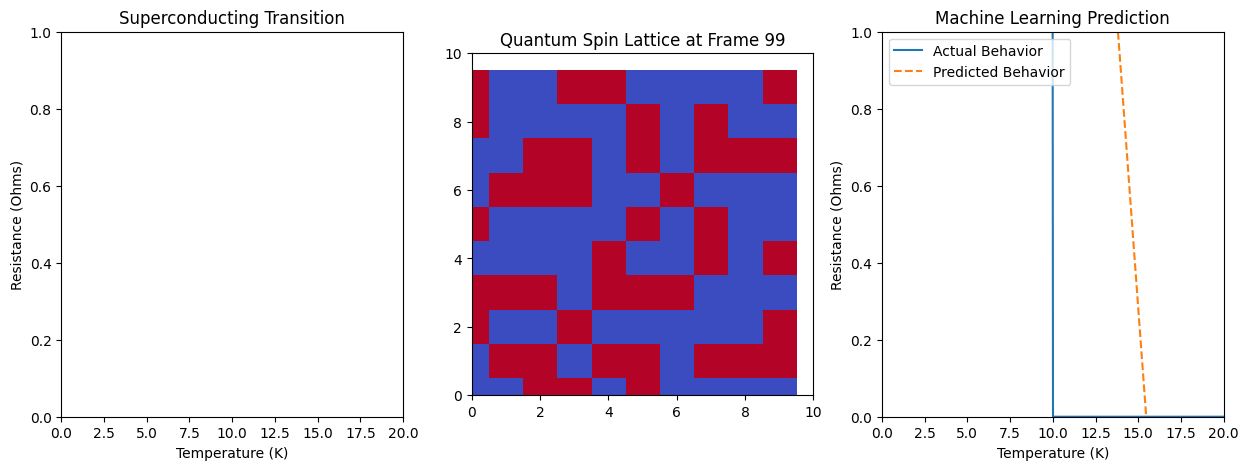

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from moviepy.editor import VideoFileClip, concatenate_videoclips

# --- Part 1: Superconductivity Transition Simulation ---
Tc = 10  # Critical temperature for superconductivity (in Kelvin)
temperature = np.linspace(0, 20, 300)  # Temperature from 0 to 20 K
resistance = np.piecewise(temperature, [temperature < Tc, temperature >= Tc],
                          [lambda T: (T - Tc)**2 + 1, 0])

# --- Part 2: Quantum Spin Lattice Simulation ---
N = 10  # Grid size for quantum spin lattice
spin_lattice = np.random.choice([-1, 1], size=(N, N))  # Spins can be -1 or 1 (up or down)

# --- Part 3: Machine Learning Model for Material Behavior ---
# Generate synthetic data for the model (temperature vs. resistance)
X = np.linspace(0, 20, 1000).reshape(-1, 1)  # Temperature range from 0 to 20
Y = np.piecewise(X.flatten(), [X.flatten() < Tc, X.flatten() >= Tc],
                 [lambda T: (T - Tc)**2 + 1, 0])

# Build a simple neural network model
ml_model = Sequential([
    Dense(32, input_dim=1, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

ml_model.compile(optimizer='adam', loss='mse')
ml_model.fit(X, Y, epochs=100, batch_size=32, verbose=0)

# --- Part 4: Visualization Setup ---
# Set up the figure for animation
fig, (ax_superconductivity, ax_spin_lattice, ax_ml_model) = plt.subplots(1, 3, figsize=(15, 5))

# Superconductivity Transition Plot
ax_superconductivity.set_xlim(0, 20)
ax_superconductivity.set_ylim(0, 1)
ax_superconductivity.set_xlabel('Temperature (K)')
ax_superconductivity.set_ylabel('Resistance (Ohms)')
ax_superconductivity.set_title('Superconducting Transition')

# Quantum Spin Lattice Plot
ax_spin_lattice.set_xlim(0, N)
ax_spin_lattice.set_ylim(0, N)
ax_spin_lattice.set_title('Quantum Spin Lattice')

# Machine Learning Model Plot
ax_ml_model.set_xlim(0, 20)
ax_ml_model.set_ylim(0, 1)
ax_ml_model.set_xlabel('Temperature (K)')
ax_ml_model.set_ylabel('Resistance (Ohms)')
ax_ml_model.set_title('Machine Learning Prediction')

# --- Part 5: Update Function for Animation ---
def update(frame):
    # Update Superconductivity Transition Plot
    ax_superconductivity.clear()
    ax_superconductivity.set_xlim(0, 20)
    ax_superconductivity.set_ylim(0, 1)
    ax_superconductivity.set_xlabel('Temperature (K)')
    ax_superconductivity.set_ylabel('Resistance (Ohms)')
    ax_superconductivity.set_title('Superconducting Transition')
    ax_superconductivity.plot(temperature[:frame], resistance[:frame], 'b-', label='Resistance')

    # Update Quantum Spin Lattice Plot
    global spin_lattice
    x, y = np.random.randint(0, N, 2)  # Random position in the lattice
    spin_lattice[x, y] *= -1  # Flip the spin at (x, y)
    ax_spin_lattice.clear()
    ax_spin_lattice.set_xlim(0, N)
    ax_spin_lattice.set_ylim(0, N)
    ax_spin_lattice.set_title(f'Quantum Spin Lattice at Frame {frame}')
    ax_spin_lattice.imshow(spin_lattice, cmap='coolwarm', interpolation='nearest')

    # Update Machine Learning Model Plot
    ax_ml_model.clear()
    ax_ml_model.set_xlim(0, 20)
    ax_ml_model.set_ylim(0, 1)
    ax_ml_model.set_xlabel('Temperature (K)')
    ax_ml_model.set_ylabel('Resistance (Ohms)')
    ax_ml_model.set_title('Machine Learning Prediction')
    ml_predictions = ml_model.predict(X)
    ax_ml_model.plot(X, Y, label='Actual Behavior')
    ax_ml_model.plot(X, ml_predictions, label='Predicted Behavior', linestyle='--')
    ax_ml_model.legend()

    return ax_superconductivity, ax_spin_lattice, ax_ml_model

# --- Part 6: Create Animation ---
ani = FuncAnimation(fig, update, frames=100, interval=100, blit=False)

# --- Part 7: Save the Animation ---
ani.save('quantum_materials_superconductivity.mp4', writer='ffmpeg', fps=30)

# --- Display the Final Animation ---
plt.show()
